# BASIC STATISTICS -01

In [12]:
#load the datasets
import pandas as pd
df=pd.read_csv('sales_data_with_discounts.csv')
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


# EDA process

In [3]:
#information about these dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [4]:
df.isnull().sum() #for checking missing values

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

In [16]:
# duplicates values
df.duplicated().any()


False

In [6]:
num_col=[i for i in df.columns if df[i].dtype!='O'] # to identify numerical columns in dataset
num_col

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [7]:
# identify categorical columns in dataset
cat_col=[i for i in df.columns if df[i].dtype=='O']
cat_col

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

In [8]:
# using INTER QUANTILE METHODS
q1=df[num_col].quantile(0.25)
q3=df[num_col].quantile(0.75)
IQR=q3-q1
low_ext=q1-1.5*IQR
upp_ext=q3+1.5*IQR
print('lower_extreme:',low_ext)
print('upper_extreme:',upp_ext)

lower_extreme: Volume                  -1.500000
Avg Price           -13987.500000
Total Sales Value   -73050.000000
Discount Rate (%)        7.740579
Discount Amount      -6823.594880
Net Sales Value     -66266.347664
dtype: float64
upper_extreme: Volume                   10.500000
Avg Price             24552.500000
Total Sales Value    128950.000000
Discount Rate (%)        24.339202
Discount Amount       12600.549611
Net Sales Value      116316.469161
dtype: float64


In [9]:
#removing outliers
new_df=df[(df[num_col] >= low_ext) & (df[num_col] <=upp_ext)]
print('Before removing outliers:',len(df))
print('After removing outliers:',len(new_df))
print('Outliers:',len(df)-len(new_df))

Before removing outliers: 450
After removing outliers: 450
Outliers: 0


In [10]:
#capping - change the outliers values to upper or lower values
new_df=df.copy()

# Apply capping
df_capped = new_df.clip(lower=low_ext, upper=upp_ext, axis=1)
df1=df_capped

In [11]:
#Measures of Central tendency

In [12]:
mean=df1[['Volume','Avg Price','Total Sales Value','Discount Rate (%)','Discount Amount','Net Sales Value']].mean()
mean

Volume                   4.604444
Avg Price             6447.100000
Total Sales Value    31407.502222
Discount Rate (%)       15.298219
Discount Amount       3140.918968
Net Sales Value      28189.030727
dtype: float64

In [13]:
median=df1[['Volume','Avg Price','Total Sales Value','Discount Rate (%)','Discount Amount','Net Sales Value']].median()
median

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [14]:
mode=df1[['Volume','Avg Price','Total Sales Value','Discount Rate (%)','Discount Amount','Net Sales Value']].mode()
mode

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,3.0,24552.5,128950,7.740579,12600.549611,116316.469161


In [15]:
#the spread of the data Dispersion
std=df1[['Volume','Avg Price','Total Sales Value','Discount Rate (%)','Discount Amount','Net Sales Value']].std()
std

Volume                   2.765759
Avg Price             8653.756795
Total Sales Value    44686.313870
Discount Rate (%)        3.923669
Discount Amount       3871.173841
Net Sales Value      40858.528122
dtype: float64

# Data visualization

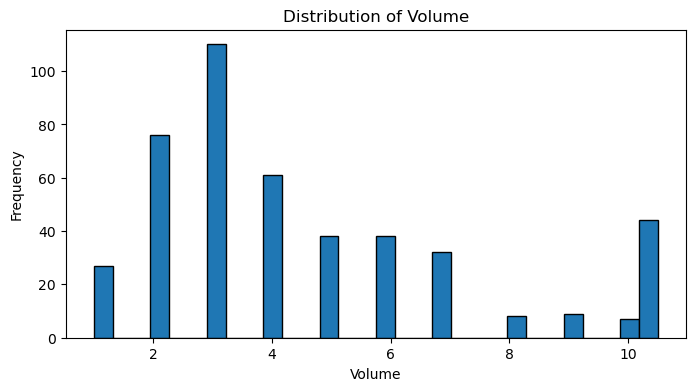

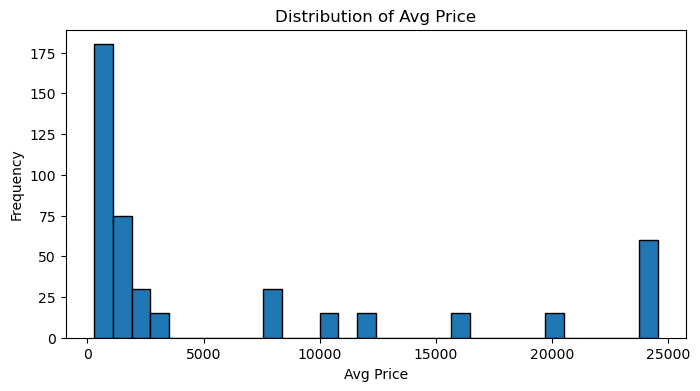

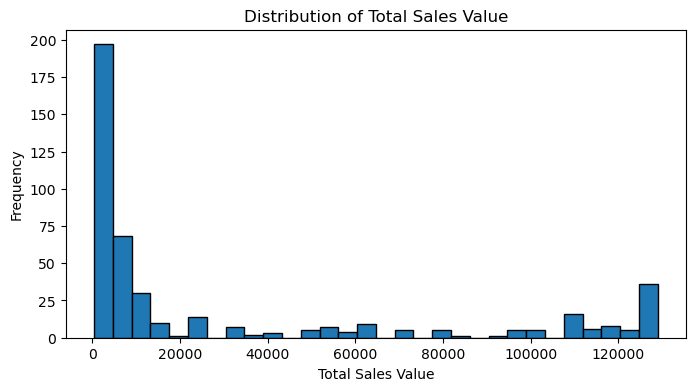

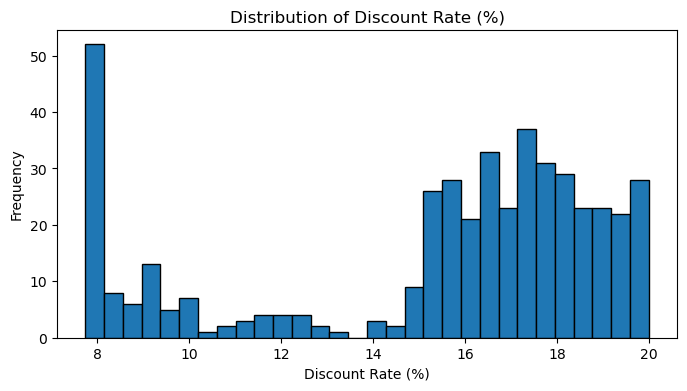

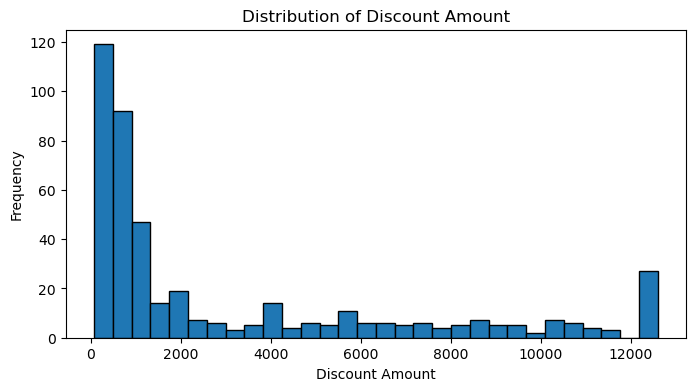

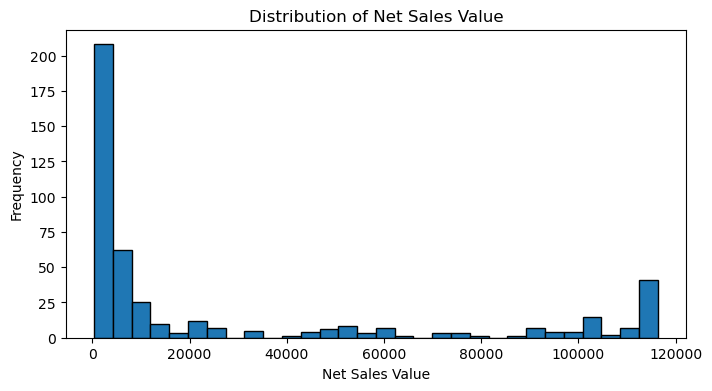

In [16]:
import matplotlib.pyplot as plt

for col in num_col:
    plt.figure(figsize=(8, 4))
    plt.hist(df1[col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


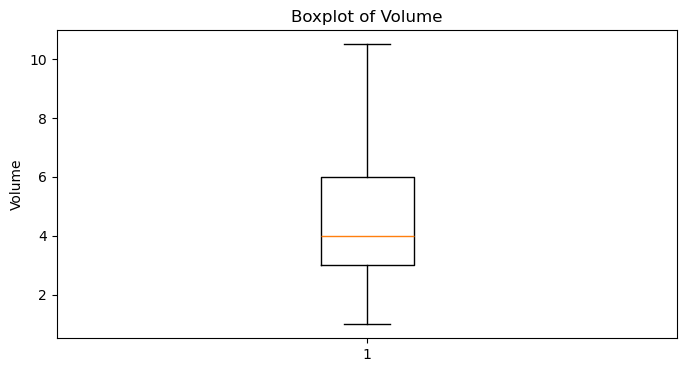

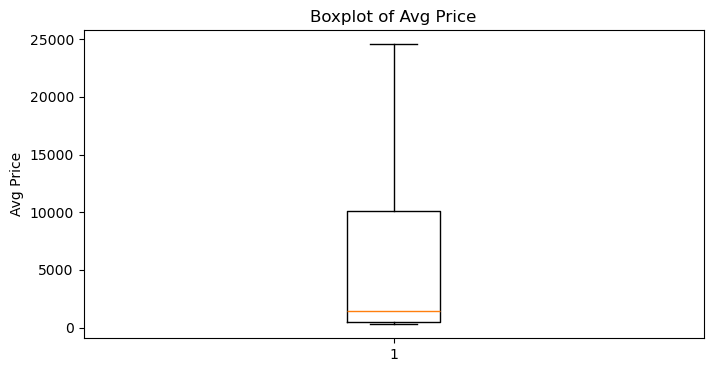

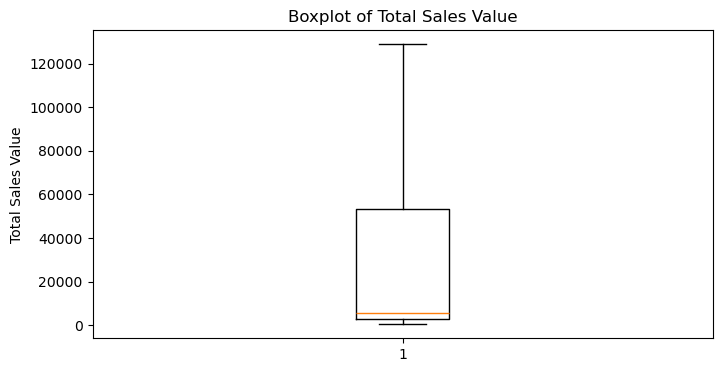

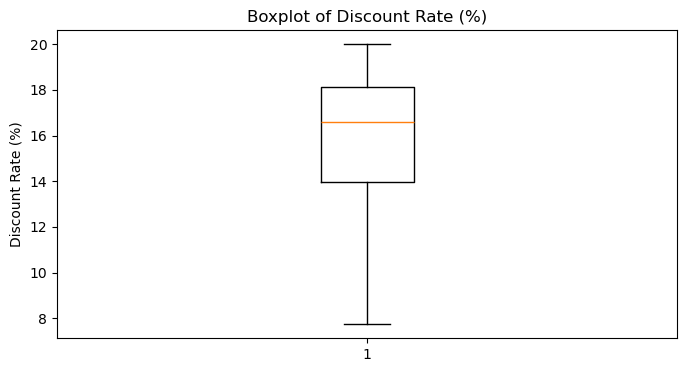

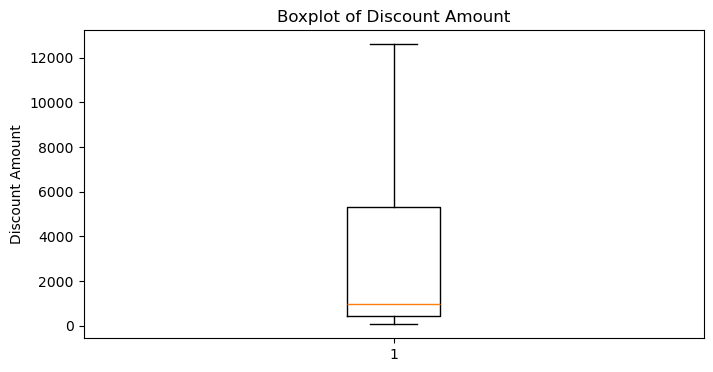

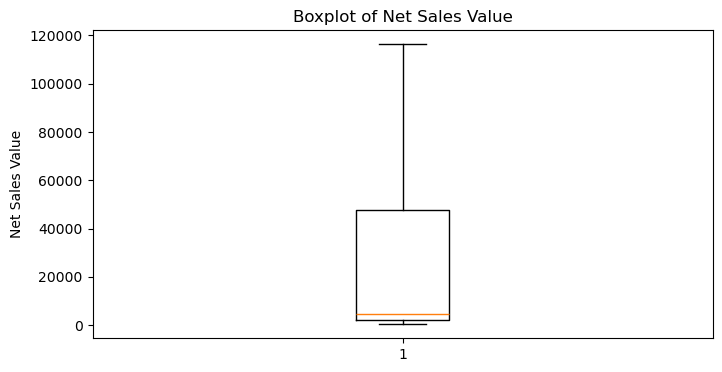

In [17]:
for col in num_col:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df1[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()


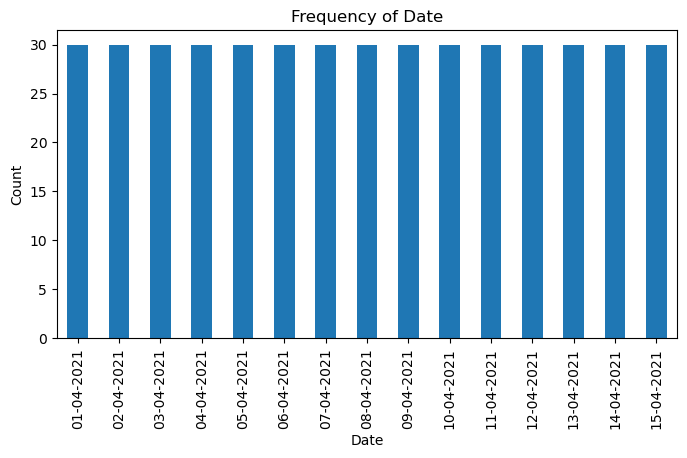

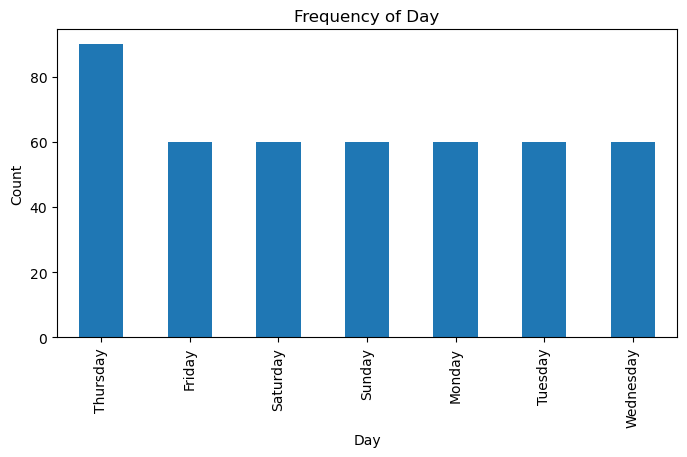

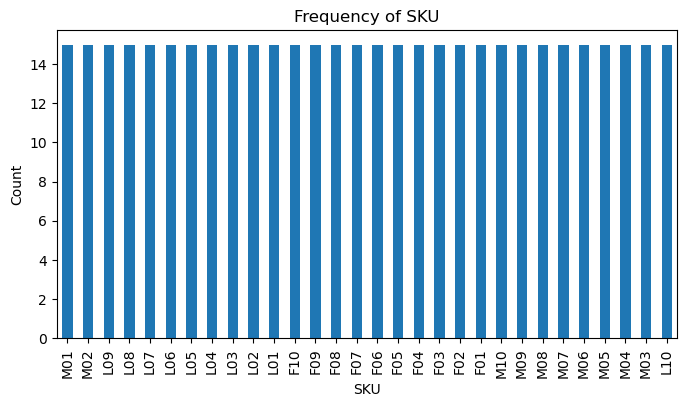

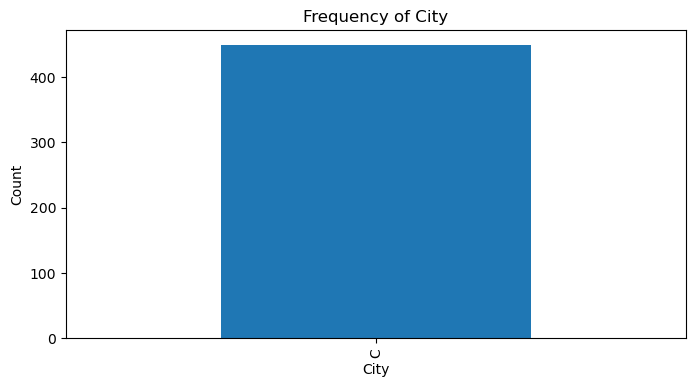

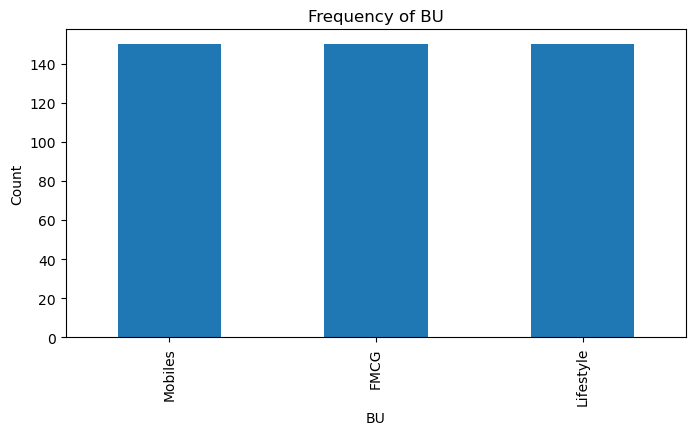

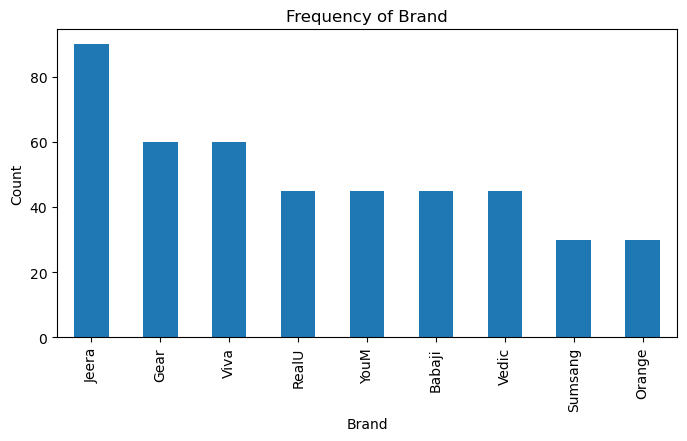

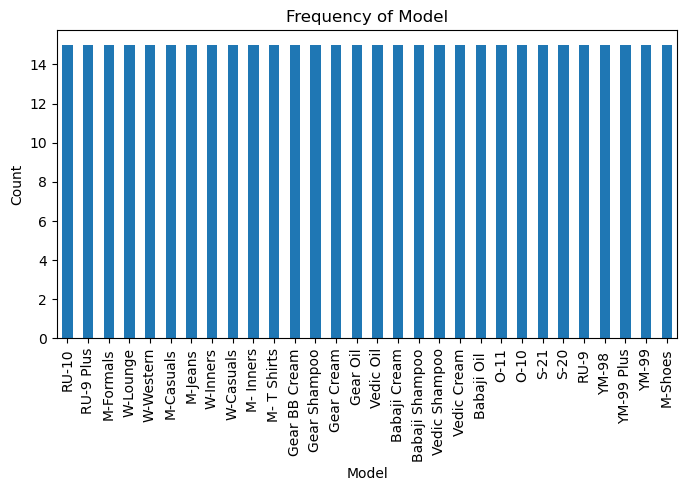

In [18]:
for col in cat_col:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


# Standardization of Numerical Variables

In [4]:
#scaling the data of numericals columns 

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler

In [21]:
num_col=[i for i in df1.columns if df1[i].dtype!='O'] # to identify numerical columns in dataset
num_col

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [22]:
scaler = StandardScaler()
df[num_col] = scaler.fit_transform(df1[num_col])
df[num_col]

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.133995,0.653958,2.185257,-0.929603,2.446327,2.159293
1,1.953012,0.422587,1.559089,-0.953669,2.207259,1.497922
2,0.867112,1.116699,1.821206,-1.490400,1.943947,1.809543
3,0.505145,1.579441,1.998190,-1.928310,1.350745,2.059311
4,-0.580756,0.191216,-0.159230,0.688245,0.318611,-0.202434
...,...,...,...,...,...,...
445,-0.942722,-0.595444,-0.645378,0.045280,-0.708209,-0.636840
446,0.505145,-0.445053,-0.354137,0.448755,-0.124137,-0.373653
447,-0.942722,-0.560739,-0.631936,0.935709,-0.655316,-0.627150
448,-0.580756,-0.526033,-0.575928,0.381393,-0.564725,-0.574478


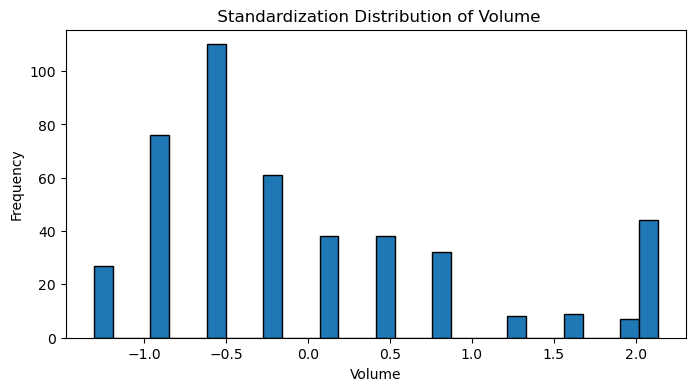

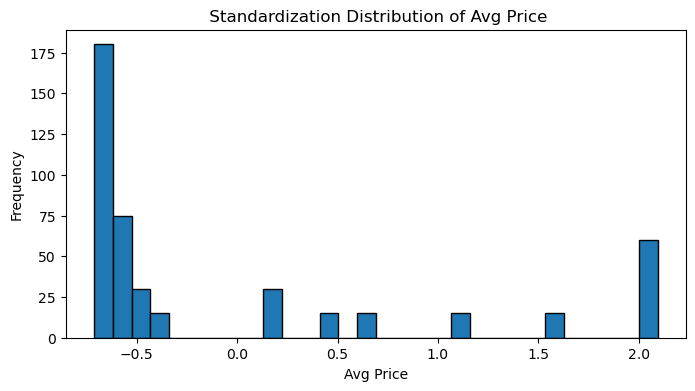

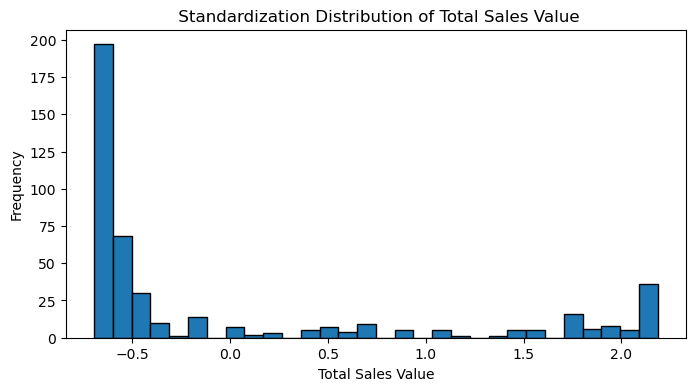

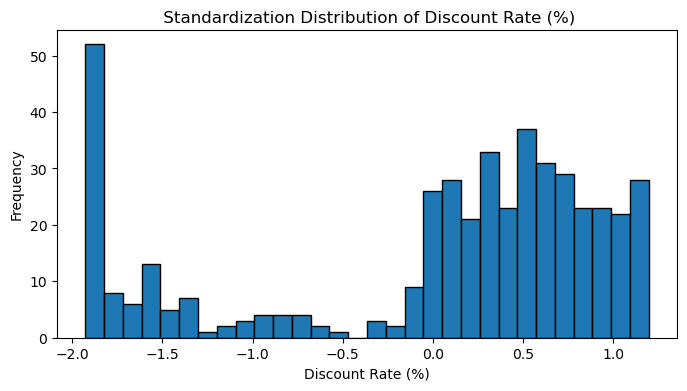

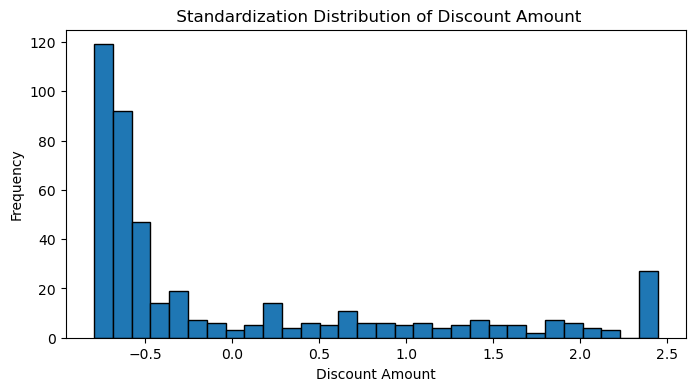

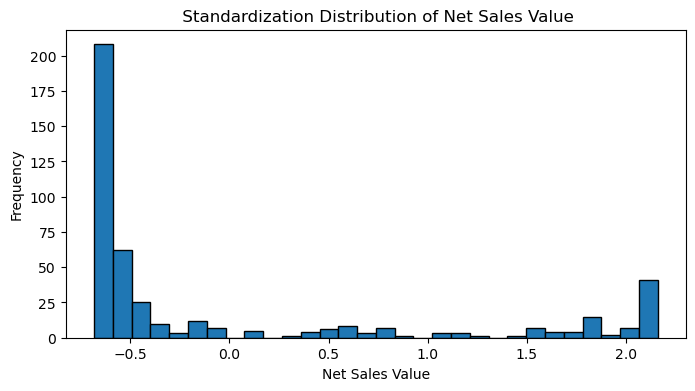

In [23]:
for col in df[num_col]:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f' Standardization Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [24]:
StandCol=df[num_col] #stardard the data (-3 to 3)
StandCol

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.133995,0.653958,2.185257,-0.929603,2.446327,2.159293
1,1.953012,0.422587,1.559089,-0.953669,2.207259,1.497922
2,0.867112,1.116699,1.821206,-1.490400,1.943947,1.809543
3,0.505145,1.579441,1.998190,-1.928310,1.350745,2.059311
4,-0.580756,0.191216,-0.159230,0.688245,0.318611,-0.202434
...,...,...,...,...,...,...
445,-0.942722,-0.595444,-0.645378,0.045280,-0.708209,-0.636840
446,0.505145,-0.445053,-0.354137,0.448755,-0.124137,-0.373653
447,-0.942722,-0.560739,-0.631936,0.935709,-0.655316,-0.627150
448,-0.580756,-0.526033,-0.575928,0.381393,-0.564725,-0.574478


# Conversion of Categorical Data into Dummy Variables

In [25]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [26]:
one_hot=make_pipeline(OneHotEncoder())
ord_enc=make_pipeline(OrdinalEncoder())


In [27]:
transformers=ColumnTransformer([('one_hot',one_hot,['Date','City']),('ord_enc',ord_enc,['Day', 'SKU','BU', 'Brand', 'Model'])])
transformers

ColumnTransformer(transformers=[('one_hot',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Date', 'City']),
                                ('ord_enc',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Day', 'SKU', 'BU', 'Brand', 'Model'])])

In [28]:
transformers.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('one_hot',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Date', 'City']),
                                ('ord_enc',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Day', 'SKU', 'BU', 'Brand', 'Model'])])>

In [29]:
df1=pd.DataFrame(transformers.fit_transform(df[cat_col]),columns=transformers.get_feature_names_out())
df1

,one_hot__Date_01-04-2021,one_hot__Date_02-04-2021,one_hot__Date_03-04-2021,one_hot__Date_04-04-2021,one_hot__Date_05-04-2021,one_hot__Date_06-04-2021,one_hot__Date_07-04-2021,one_hot__Date_08-04-2021,one_hot__Date_09-04-2021,one_hot__Date_10-04-2021,...,one_hot__Date_12-04-2021,one_hot__Date_13-04-2021,one_hot__Date_14-04-2021,one_hot__Date_15-04-2021,one_hot__City_C,ord_enc__Day,ord_enc__SKU,ord_enc__BU,ord_enc__Brand,ord_enc__Model
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,4.0,20.0,2.0,4.0,15.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,4.0,21.0,2.0,4.0,17.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,4.0,22.0,2.0,8.0,28.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,4.0,23.0,2.0,8.0,29.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,4.0,24.0,2.0,8.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,4.0,15.0,1.0,2.0,9.0
446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,4.0,16.0,1.0,7.0,26.0
447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,4.0,17.0,1.0,7.0,25.0
448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,4.0,18.0,1.0,2.0,10.0


In [30]:
df_encoded = pd.get_dummies(df, columns=cat_col,dtype='int' ,drop_first=True)
df_encoded

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.133995,0.653958,2.185257,-0.929603,2.446327,2.159293,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.953012,0.422587,1.559089,-0.953669,2.207259,1.497922,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.867112,1.116699,1.821206,-1.490400,1.943947,1.809543,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.505145,1.579441,1.998190,-1.928310,1.350745,2.059311,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.580756,0.191216,-0.159230,0.688245,0.318611,-0.202434,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,-0.942722,-0.595444,-0.645378,0.045280,-0.708209,-0.636840,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,0.505145,-0.445053,-0.354137,0.448755,-0.124137,-0.373653,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,-0.942722,-0.560739,-0.631936,0.935709,-0.655316,-0.627150,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,-0.580756,-0.526033,-0.575928,0.381393,-0.564725,-0.574478,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
